In [1]:
# Pandas, NumPy, Patsy
import pandas as pd
import numpy as np
import patsy

# Machine-learning
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Figures and Graphs
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
# Custom-made perceptron functions (MIT coursework)

In [3]:
def perceptron_origin(x, y, theta):
    #theta_zero = np.array([0, 0])
    theta_list = []
    
    if y*(theta.dot(x)) <= 0:
        theta_update = theta + (y * x)
        theta_list.append(theta_update)
        return theta_list
    else:
        return theta

In [4]:
perceptron_origin(np.array([0,1,0]), 1, np.array([-1,0,0]))

[array([-1,  1,  0])]

In [5]:
def perceptron_not_origin(x, y, theta, offset):
    #theta_zero = np.array([0, 0])
    theta_list = []
    offset_list = []
    
    if y*(theta.dot(x) + offset) <= 0:
        theta_update = theta + (y * x)
        theta_list.append(theta_update)
        offset_update = offset + y
        offset_list.append(offset_update)
        return theta_list, offset_list
    else:
        return theta, offset

In [2]:
# AMAZON DATASET WITH CATEGORICAL AND BINARY VARIABLES

In [3]:
# Columns 'helpfulY' and 'helpfulN' are number of people who found the review helpful or not helpful
# Target variable - 'sentiment' (result is 1 or -1, i.e. like or not like respectively)
# Predictors - 'summary', 'text', 'helpfulY', 'helpfulN'

In [4]:
amazon = pd.read_csv('../data/reviews_train.tsv', sep='\t', encoding='unicode_escape')
amazon.head()

,sentiment,productId,userId,summary,text,helpfulY,helpfulN
0,-1,B000EQYQBO,A2JZVE0Y19VLL0,blue chips,The chips are okay Not near as flavorful as th...,0,0
1,-1,B000LKVHYC,A3NAKOMAS0I5L9,Bad even for 'healthy',"I had high hopes for this, but it was bad. Re...",0,0
2,-1,B003QRQRY2,ARBO3XW14MNGA,Alot of money for one can,I guess it's only one can since there is nothi...,1,1
3,-1,B008EG58V8,A1IQXGT4MJUYJ8,"The Box says ""OATMEAL SQUARES"" which I believe...","""Oatmeal Squares"" is in about the largest prin...",0,0
4,1,B004WZZY8M,A2TBL6WAZGXB9P,Delicious!,"I really enjoyed this flavor, this has a very ...",1,0


In [5]:
amazon.shape

(4000, 7)

In [6]:
# Yes/No answers seem balanced in number
amazon['sentiment'].value_counts(dropna=False)

-1    2030
 1    1970
Name: sentiment, dtype: int64

In [7]:
amazon.loc[amazon['helpfulY'] > 100]

,sentiment,productId,userId,summary,text,helpfulY,helpfulN
429,-1,B0083T5TAQ,A3C5YHTV72WYJY,Not a nice assortment,I have wanted to try flavored coffee but didn'...,144,5
2097,-1,B008ZRKZSM,A1L331YOJ0OL4Q,Great flavor!,This is a tricky product to review. On the on...,180,8
2539,-1,B0062A87HA,AFKU54VTOF81V,Is this manufacturer using Amazon to close out...,Our dog gets pumpkin in every meal -- if yours...,112,10
3144,1,B0019RLJV2,A1JADFWTTDPITL,The Cheesiest.,"As I sit here, with a mouth full of this fine ...",157,25


In [8]:
amazon_data = amazon.drop(['productId', 'userId'], axis=1)
amazon_data.sample(10)

,sentiment,summary,text,helpfulY,helpfulN
3188,1,"Emeril's Blast, a Blast!",great hard to find spicy flavoring. my local g...,1,0
78,1,Love this stuff,This is a great snack when you are on the go a...,0,0
3820,-1,Expensive now!,When in the hell did this coffee skyrocket it'...,5,1
3548,1,Excellent,"I love this candy so much, It was so hard to f...",0,0
2740,1,Folgers Gourmet Selection KCup Vanilla Biscotti,"I bought these for my dad, he received a Keuri...",0,0
3377,-1,Eat at Your Own Risk...,"Too risky for me, so I never ate this stuff an...",0,0
1234,-1,Tasty but not much of a snack,"These are an absolutely delicious snack, howev...",1,0
3971,-1,pure sugar,"If you want to pay a lot for sugar, then buy t...",0,0
2724,-1,eh,Frosted Confetti Pop Tarts sounds really good....,0,0
1015,-1,"First order excellent, second order awful!","My first order was wonderful: fresh, tight pel...",2,0


In [9]:
amazon_data.loc[3144,'text']

'As I sit here, with a mouth full of this fine Kraft product, I can\'t help but remember that fateful December afternoon. The war had ended some time ago, yet you could still hear the resentment resonating through the townsfolk\'s gnashed teeth. Jake and I were at the bar, as usual, trying to drink away the sun. The barkeep, sliding a filthy rag across the counter, squinted as he tried to read our shirts. He let a grin escape and shook his head.<br /><br />"You got a problem, old man?" Jake took off his glasses.<br /><br />The barkeep ran his forearm across his wrinkled face. "Ain\'t no problem here. You boys have guts, is all, wearin\' those Kraft logos around these parts. This is a Stouffer\'s county."<br /><br />Jake stood up, sliding his stool back across the hardwood floor. "If I wanted to choke down frozen food, I\'d move my ass to Alaska. I\'ll take The Cheesiest any day." We used to call him Jake the Patriot. Always looking for a fight. I grabbed his arm in a vain attempt to pa

In [10]:
amazon_data.loc[3144,'summary']

'The Cheesiest.'

In [11]:
amazon_data.loc[3144,'sentiment']

1

In [12]:
# Create new column for number of words in 'text' column

amazon_data['text_count'] = amazon_data['text'].str.count(' ') + 1

In [13]:
amazon_data.head(10)

,sentiment,summary,text,helpfulY,helpfulN,text_count
0,-1,blue chips,The chips are okay Not near as flavorful as th...,0,0,19
1,-1,Bad even for 'healthy',"I had high hopes for this, but it was bad. Re...",0,0,32
2,-1,Alot of money for one can,I guess it's only one can since there is nothi...,1,1,26
3,-1,"The Box says ""OATMEAL SQUARES"" which I believe...","""Oatmeal Squares"" is in about the largest prin...",0,0,116
4,1,Delicious!,"I really enjoyed this flavor, this has a very ...",1,0,45
5,-1,Awful,Awful! not coffee this is instant coffee and ...,0,0,25
6,-1,Not The Best Cookies I've Ever Had!,I was sorely disappointed in these cookies.. T...,0,0,35
7,1,GREAT results with continued use at the prescr...,My 10 year-old black pug has problems with her...,0,0,174
8,1,Good Find!,I've been looking for dried bell peppers ever ...,5,0,38
9,1,Pretty tasty and very handy for the health con...,Dont go into this thinking after you mix up yo...,0,0,199


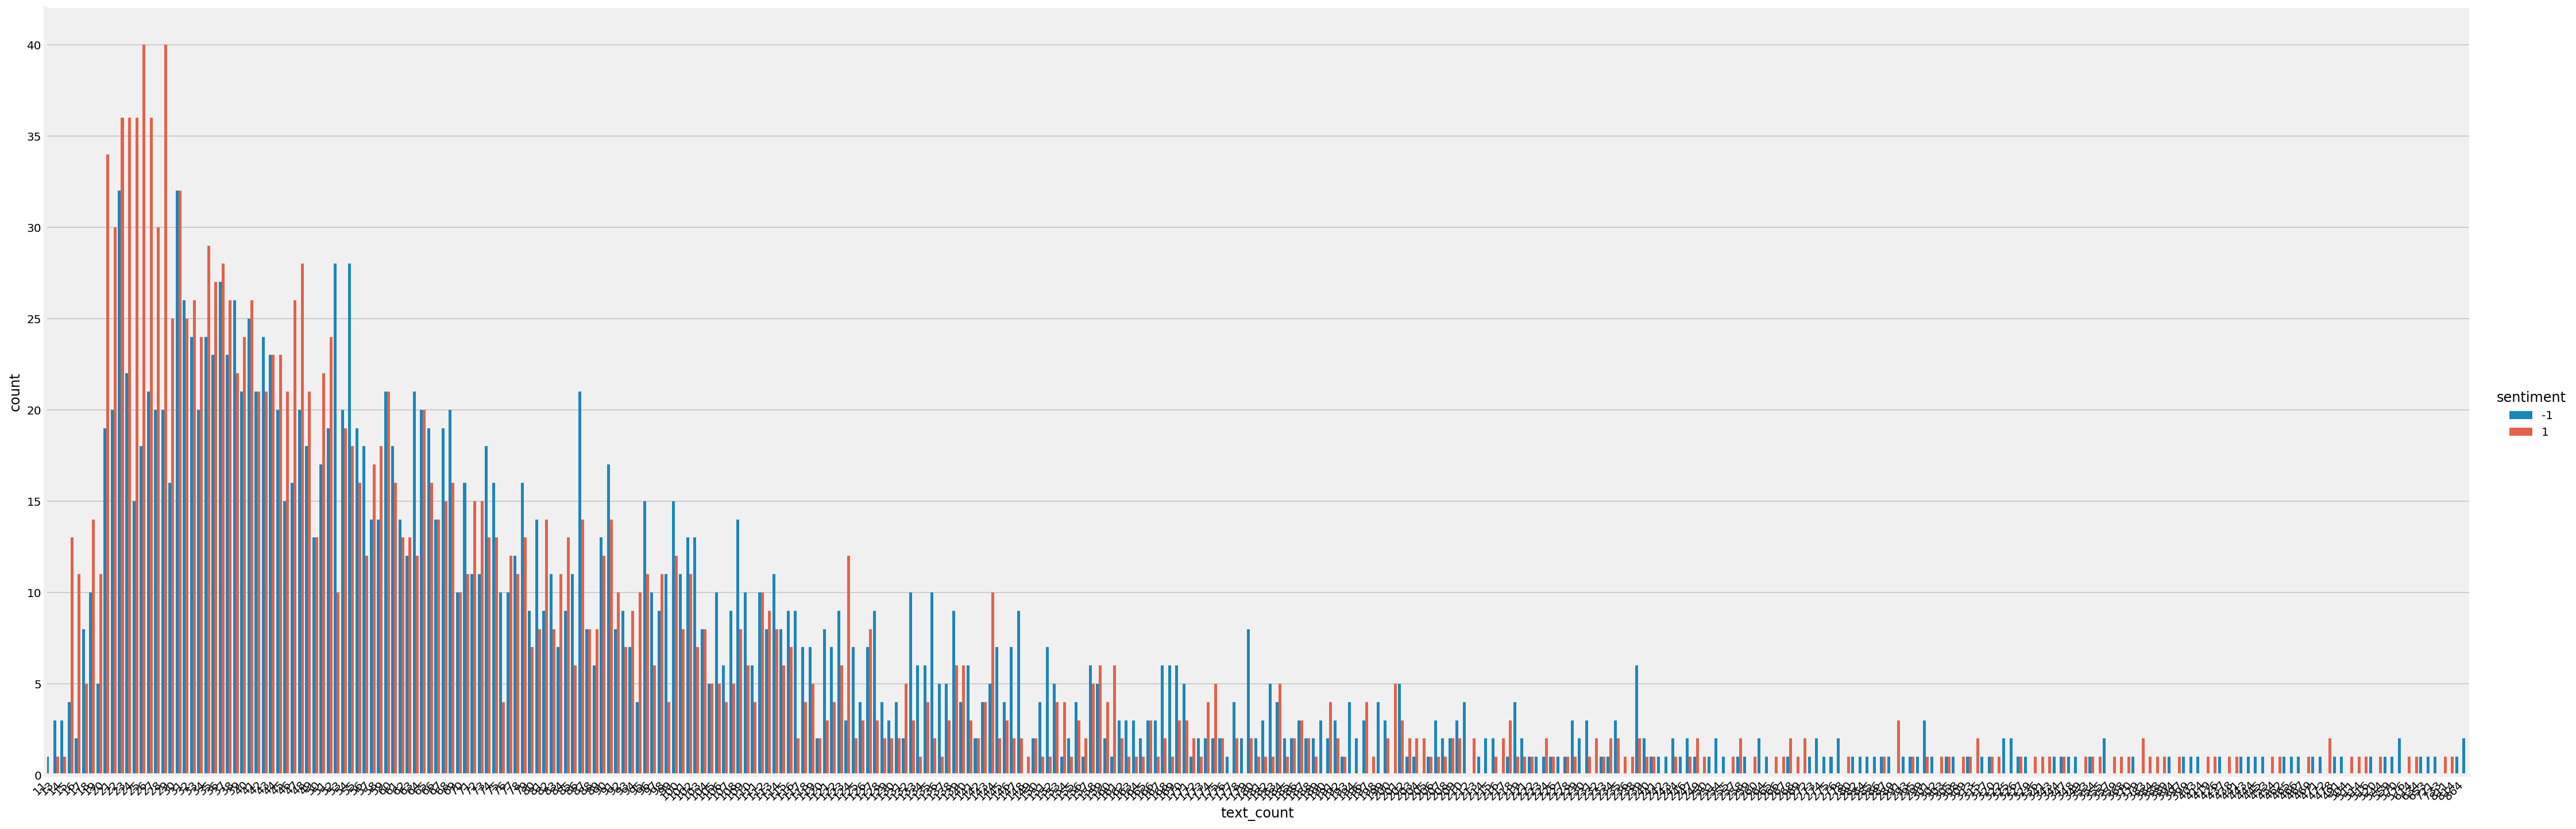

In [14]:
# Does total number of words in text indicate sentiment?
# The smaller the text count the more likely the person is to like the product...

sns.catplot('text_count', hue='sentiment', data=amazon_data, kind='count', height=10, aspect=3).set_xticklabels(rotation=45, horizontalalignment='right');

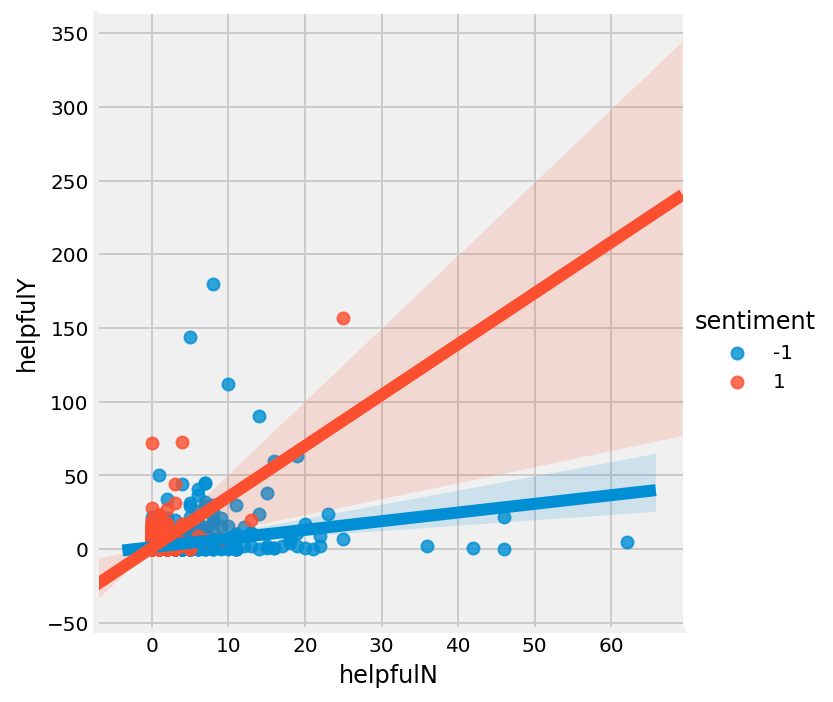

In [15]:
# 'helpfulY' and 'helpfulN' could be useful predictors...

sns.lmplot(x='helpfulN', y='helpfulY', data=amazon_data, hue='sentiment')

In [16]:
# Features variable is 'helpfulY', 'helpfulN', 'text_count'
# Target variable is 'sentiment'

feature_cols = ['helpfulY', 'helpfulN', 'text_count']

X = amazon_data[feature_cols]
y = amazon_data['sentiment']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Perceptron

Use already imported model Perceptron() from SciKit-Learn Library at top of the page

In [18]:
# Create Polynomial Features for testing (did not improve accuracy results)

#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(5)
#poly_matrix = poly.fit_transform(X[['helpfulY', 'helpfulN', 'text_count']])
#poly_X = pd.DataFrame(poly_matrix)

#X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_X, y)

In [18]:
pctron = Perceptron(max_iter=10, eta0=0.01)
pctron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# Mean Accuracy for model based on training set
# Options for scoring type available from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
pctron_scores = cross_val_score(pctron, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print("Mean Accuracy for Training Set: ", np.mean(pctron_scores))

Mean Accuracy for Training Set:  0.5056650074027983


In [20]:
# Mean Accuracy for model based on testing set
pctron_scores_new = cross_val_score(pctron, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)
print("Mean Accuracy for Testing Set: ", np.mean(pctron_scores_new))

Mean Accuracy for Testing Set:  0.5170102252556315


In [21]:
# Create predicted scores and compare to real scores
y_pred_pctron = pctron.predict(X_test)

In [22]:
# Just over 50% accuracy...and results only slightly improved after tuning hyperparameters
# Suggests data may not be linearly separable
print("Perceptron Accuracy: ", accuracy_score(y_test, y_pred_pctron))

Perceptron Accuracy:  0.518


In [57]:
# GRIDSEARCH for optimal learning rate value (perform on pctron model with no parameters set)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define dictionary of values
lr_grid = dict()
lr_grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define search
lr_search = GridSearchCV(pctron, lr_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform search
lr_results = lr_search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % lr_results.best_score_)
print('Config: %s' % lr_results.best_params_)

Mean Accuracy: 0.554
Config: {'eta0': 0.01}


In [63]:
# GRIDSEARCH for optimal max_iter

# define dictionary of max_iter values
iter_grid = dict()
iter_grid['max_iter'] = [1, 10, 100, 1000, 10000]

# define search
iter_search = GridSearchCV(pctron, iter_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
iter_results = iter_search.fit(X_train, y_train)

# summarize results
print('Mean Accuracy: %.3f' % iter_results.best_score_)
print('Config: %s' % iter_results.best_params_)

Mean Accuracy: 0.558
Config: {'max_iter': 10}


## Naive Bayes Classifier

Naive Bayes can be used for non-linear data, which we may be dealing with. 
Use already imported model GaussianNB() at top of the page - from SciKit-Learn Library

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
# Accuracy on testing set is over 55%, slightly above Perceptron

print("Naive Bayes Accuracy: ", nb.score(X_test, y_test))

Naive Bayes Accuracy:  0.576


In [25]:
y_pred = nb.predict(X_test)

print("Naïve Bayes Classification Report: \n", classification_report(y_test, y_pred))

# Recall means when the result is actually -1, how often is it predicted correctly? 21% true positive rate which is low
# F1-score is the average between precision and recall 
# (precision high + recall low equals low f1-score)
# (precision low + recall high equals high f1-score)
# Support is the number of actual occurrences of that class in the testing set - this set is balanced
# (imbalanced datasets indicates weakness maybe need stratified sampling but this is OK)

Naïve Bayes Classification Report: 
               precision    recall  f1-score   support

          -1       0.86      0.21      0.34       516
           1       0.53      0.96      0.69       484

    accuracy                           0.58      1000
   macro avg       0.70      0.59      0.51      1000
weighted avg       0.70      0.58      0.51      1000



In [28]:
# Generate confusion matrix to compare actual results with predictions

cm = confusion_matrix(y_test, y_pred)
cm

array([[110, 406],
       [ 18, 466]], dtype=int64)

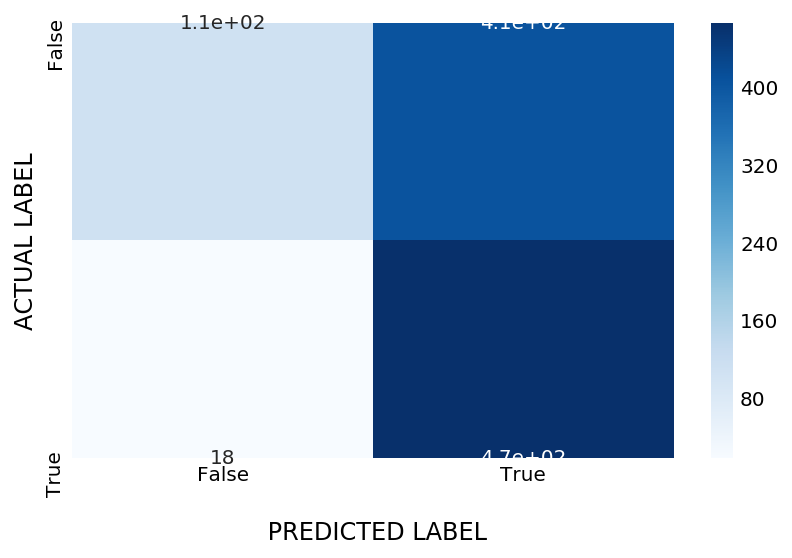

In [30]:
# Display confusion matrix

x_axis = ["False", "True"]
y_axis = ["False", "True"]

sns.heatmap(cm, annot=True, linecolor="black", cmap="Blues", xticklabels=x_axis, yticklabels=y_axis)
plt.xlabel("\n PREDICTED LABEL")
plt.ylabel("ACTUAL LABEL")
plt.show();

In [45]:
# Helper function to plot a decision boundary - NOT WORKING!

def plot_decision_boundary(X, y):
    # Fit the Naive Bayes model
    nb = GaussianNB()
    nb.fit(X, y)
    
    # Set min and max values and give it some padding
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the Bayes value for flattened grid
    Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Plot the contour using entire dataset
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [54]:
# Plot the decision boundary
            
#plot_decision_boundary(X_train, y_train)
#plt.title("Naive Bayes Decision Boundary");

In [ ]:
# Somewhere in code it does not like * ... prefers np.dot()...

## Support Vector Machine

SVMs can be used with data that is not separable linearly. Make sure to use kernels 'poly' and 'rbf' only when using the imported model from SciKit Library (see top of page)

In [ ]:
# If 'auto', uses 1 / no. of features
# 'degree' and 'coef0' used only with polynomial kernel

svm = SVC(C=1.0, kernel='poly', degree=3, gamma='auto', coef0=1, random_state=42)
svm.fit(X_train, y_train)

In [38]:
# Over 60% means 'rbf' model works slightly better than Perceptron and Naive Bayes which means data most likely non-linear

print("Testing Set Accuracy: ", svm.score(X_test, y_test))

Testing Set Accuracy:  0.628


In [39]:
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))

SVM Accuracy:  0.628


In [40]:
# Not much difference between model validation and cross-validation therefore overfitting unlikely

svm_scores = cross_val_score(svm, X_test, y_test, cv=5)
print("Cross Validation score: ", svm_scores.mean())

Cross Validation score:  0.6329961499037475


In [42]:
# Tuning regularization parameter 'C' of svm model 
# (using GridSearchCV takes too long:
#   with kernel 'rbf', best C value is 1.0 
#   with kernel 'poly' best C value is )

from sklearn.model_selection import RandomizedSearchCV

# Generate dictionary of values to test
reg_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svm_reg = RandomizedSearchCV(svm, reg_grid, n_iter=7, cv=5, random_state=2020)
svm_reg.fit(X_train, y_train)

print("Best C value ", svm_reg.best_params_)

In [ ]:
# Tuning parameter 'degree' with polynomial model

from sklearn.model_selection import RandomizedSearchCV

# Generate dictionary of values to test
degree_grid = {"degree": [3, 4, 5, 6, 10, 15, 20]}

svm_random = RandomizedSearchCV(svm, degree_grid, n_iter=7, cv=5, random_state=2020)
svm_random.fit(X_train, y_train)

print("Best degree value with polynomial kernel ", svm_random.best_params_)

In [ ]:
# How to use coef0 parameter